In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from riskyneuroarousal.utils.load_data import load_behavioral_data

In [2]:
gains = np.arange(5, 41)
losses = np.arange(5, 21)
gains_equalIndifference = np.arange(10, 41, 2)
gains_equalRange = np.arange(5, 21, 1)
losses_both = np.arange(5, 21, 1)
shared_gains = np.arange(10, 21, 2)

In [3]:
behavior = load_behavioral_data(min_RT = 0.2)
behavior['uncertain'] = behavior["response_int"].apply(lambda x: 1 if x == 2 or x == 3 else 0)
mean_behavior = behavior.groupby(["condition", "gain", "loss"])[["RT", "accept", "uncertain"]].mean().reset_index()

In [4]:
accept = []
uncertain = []
RT = []
condition = []
gains_plot = []
losses_plot = []

for gain in gains:
    for loss in losses:
        equalIndifference = mean_behavior.query(f"condition == 'equalIndifference' & gain == {gain} & loss == {loss}")
        equalRange = mean_behavior.query(f"condition == 'equalRange' & gain == {gain} & loss == {loss}")

        if equalIndifference.empty:
            accept.append(np.nan)
            RT.append(np.nan)
            uncertain.append(np.nan)
        else:
            accept.append(equalIndifference.accept.values[0])
            RT.append(equalIndifference.RT.values[0])
            uncertain.append(equalIndifference.uncertain.values[0])

        condition.append("equalIndifference")
        gains_plot.append(gain)
        losses_plot.append(loss)

        if equalRange.empty:
            accept.append(np.nan)
            RT.append(np.nan)
            uncertain.append(np.nan)
        else:
            accept.append(equalRange.accept.values[0])
            RT.append(equalRange.RT.values[0])
            uncertain.append(equalRange.uncertain.values[0])

        condition.append("equalRange")
        gains_plot.append(gain)
        losses_plot.append(loss)
    
df = pd.DataFrame({"gain": gains_plot, "loss": losses_plot, "accept": accept, "RT": RT, "condition": condition, "uncertain": uncertain})

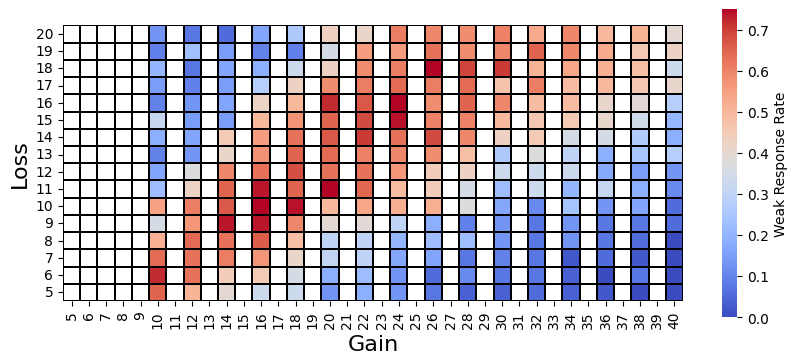

In [8]:
plt.figure(figsize=(10, 4))
hmap_data = df.query("condition == 'equalIndifference'").groupby(['loss', 'gain'])['uncertain'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
ax = sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Weak Response Rate'}, square=True, linewidths=0.2, linecolor='black')
ax.collections[0].set_clim(0, 0.75)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Increase font size of labels and ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

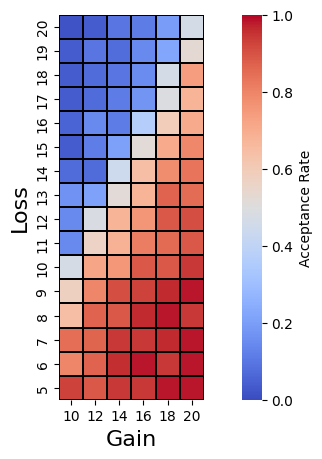

In [22]:
plt.figure(figsize=(10, 5))
hmap_data = df.query("condition == 'equalRange' & gain in @shared_gains").groupby(['loss', 'gain'])['accept'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
ax = sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Acceptance Rate'}, square=True, linewidths=0.2, linecolor='black')
ax.collections[0].set_clim(0, 1)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Increase font size of labels and ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# size of cbar


plt.show()